If you are just interested in the Python code, feel free to skip ahead to [the
Python code](#python_code).

## What is color?

Color is a phenomenon originating from the interaction between light and the
human eye within the wavelength range of 380 to 780 nm Ultraviolet-Visible light
(UV-Vis). It involves a process of organizing, identifying, and interpreting
sensory information to comprehend the presented environment. The way humans
perceive color can be influenced by various factors, including lighting
conditions, color vision deficiencies, and individual variations in color
perception.

Traditional scientific and engineering methods are not apt for measuring color
since they focus solely on stimuli without capturing the sensory information.
The field of Psychophysics|psychophysics specializes in quantifying the
relationship between physical stimuli and the sensations and perceptions they
generate.

**Psychophysics** is a scientific field that explores the relationship between
physical stimuli and subjective sensory experiences.[@kingdom2016; @schanda2007]
It attempts to describe how humans perceive and interpret various sensory
inputs, such as colors, sounds, and textures. Within this field, a significant
contribution was made by Guy Brindley in 1970 with the classification of
observations into two distinct categories, known as **Class A** and **Class B**.

The classifications of Class A and Class B observations were proposed to
understand the relationship between perceptual experiences and the underlying
mental processes during psychophysical tasks. Brindley used the term
**observation** to refer to the perceptual state of an observer while engaged in
such tasks.

**Class A observations** refer to situations where two physically different
stimuli are perceived as indistinguishable. Despite distinct physical
properties, the observer cannot perceive any difference between them. For
example, two different shades of red may be perceived as the same color by a
particular observer, illustrating the limitations in color discrimination. Class
A observations pertain to scenarios where two stimuli with differing physical
attributes result in indistinguishable perceptions. A prominent example is
**color matching**. In such experiments, an observer is presented with two
stimuli under similar external conditions. If the stimuli, despite their
differing physical properties, are perceived as the same color, they are deemed
perceptually equivalent. This highlights the human visual system's ability to
maintain consistent color perception despite variances in physical
characteristics.

**Class B observations** cover all other scenarios in psychophysics where
stimuli are distinguishable from one another. These situations demonstrate
perceptual sensitivity to the differences between stimuli, covering a broad
range of psychophysical phenomena. For example, an observer can distinguish
between the taste of an apple and an orange, reflecting perceptual sensitivity
to taste.

## The CIE colorimetry system

One of the most systematic approaches to measure color is through the CIE
colorimetric standard. It is a system developed by The Commission Internationale
d’Éclairage (CIE), which is an organization dedicated to the definition and
standardization of psychophysical models for colorimetry and color
perception.[@guild1931; @smith1931]

This method creates a quantitative relationship between the distribution of
wavelengths in the UV-visible spectrum and the colors as perceived by human
vision. Widely adopted for color measurement, the CIE system introduces
standardized color spaces and metrics such as CIE XYZ, CIELAB, and CIELCh for
consistent color representation and comparison.

CIE 1931 is the original model published by CIE in 1931. It allows the
specification and reproduction of a given color perception in terms of
measurable spectral light distributions. The system finds widespread industrial
application.

The model is built using an additive color mixing approach based on the Color
Matching Functions (CMFs). CMFs represent the spectral response of each cone
cell present in the human eye. They are commonly indicated as $\bar{x}$,
$\bar{y}$, and $\bar{z}$. CMFs provide a statistical measure of human color
receptors' sensitivity to visible light.[@schanda2007; @fairman1997]

The CMFs are obtained in standardized conditions, including foveal vision, 2°
and 10° field sizes, dark surrounding, previous exposure involving a
sufficiently long dark adaptation, and an average between many observations
performed by different people.

The CMFs are convoluted with the sample spectrum $M(\lambda)$, resulting in the
calculation of tristimulus values:

$$
\begin{align}
    X &= \int_{380}^{780} M(\lambda) \bar{x}(\lambda)  \, d\lambda \\
    Y &= \int_{380}^{780} M(\lambda) \bar{y}(\lambda)  \, d\lambda \\
    Z &= \int_{380}^{780} M(\lambda) \bar{z}(\lambda)  \, d\lambda 
\end{align}
$$

These values define a point in a three-dimensional color space. For simplicity,
they are reduced to two values, $x$ and $y$, using the equations:

$$
\begin{align}
    x &= \frac{X}{X + Y + Z} \\
    y &= \frac{Y}{X + Y + Z}
\end{align}
$$

## Python code {#sec-python}

### Installing and importing libraries

Before starting with any analysis, we need to import the Python libraries that
we are going to use. In the following, we are going to use:

- `numpy`: This library is used for numerical computing. It defines efficient
  data structures and mathematical functions for working with arrays and
  matrices.
- `pandas`: This library is used for data analysis and manipulation. It defines
  data structures like DataFrames and Series for handling tabular data.
- `matplotlib`: This library is a standard for data visualization. It includes
  plotting functions for creating various types of charts and graphs.
- `colour-science`: This library defines tools for color space conversions,
  color difference metrics, and other color-related operations.

The first three are widely used for computation and data analysis in Python.
`colour-science` is specifically dedicated to colorimetric analysis and supports
most major colorimetric systems. It is extremely powerful and comprehensive,
although at times I have found the documentation
([https://colour.readthedocs.io](https://colour.readthedocs.io)) difficult to
follow.

If you want to follow along repeating the analysis on your machine and you
haven't installed these libraries yet, you can do so by running the following
`pip` command in your terminal or PowerShell:

```sh
pip install numpy pandas matplotlib colour-science
```

With the libraries installed, we can now import them into our script or Jupyter
notebook:

In [1]:
import colour as cl
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import numpy as np
import pandas as pd

# Disable some annoying warnings from colour library
cl.utilities.filter_warnings(colour_usage_warnings=True)

### Plot settings

I want the plot aesthetics to match the style of the blog, and therefore I'm
adding the following settings to customize the appearance of the graphics I am
going to generate. If you're following along on your own machine (e.g., using
Jupyter notebooks), you can skip this step.

Here, I am importing `seaborn`, a powerful library for statistical data
visualization. I won't be using its statistical functions, but I prefer its
default presets over the ones provided by `matplotlib`. After importing the
library, I am setting:

- Context `notebook`: Sets the scaling of the plots (label size, line thickness,
  etc.).
- Style `ticks`: Sets the style so that axes show ticks.
- Palette `colorblind`: Sets the default palette of colors that will be used for
  plotting. This specific choice improves accessibility for people with color
  blindness. The `color_codes` option remaps `matplotlib`'s shorthand color
  codes (such as "r", "g", "b", etc.).

In addition, I am importing `golden_ratio` from the `scipy` library, which is
equivalent to defining a variable containing the value 1.618. This is also known
as the _divine proportion_ (see the corresponding [Wikipedia
page](https://en.wikipedia.org/wiki/Golden_ratio)) and I will use it to set the
shorter to longer ratio of the plot's axes, giving them a slightly nicer
proportion.

In [2]:
import seaborn as sns
from scipy.constants import golden_ratio

# Set seaborn defaults
sns.set_theme(rc={"figure.dpi": 300})
sns.set_context("notebook")
sns.set_style("ticks")
sns.set_palette("colorblind", color_codes=True)

# Use white color for elements that are typically black
plt.style.use("dark_background")

# Remove background from figures and axes
plt.rcParams["figure.facecolor"] = "none"
plt.rcParams["axes.facecolor"] = "none"

# Default figure size to use throughout
figure_size = (7, 7 / golden_ratio)

### Plotting the CIE (2°) color space

With the basic tools in place, let's move on to producing our first color plot.
One thing that I like very much about the `colour-science` library is that it
provides handy functions for plotting color spaces according to different
colorimetric systems.

For example, calling the `plot_chromaticity_diagram_CIE1931` function together
with the option `cmfs="CIE 1931 2 Degree Standard Observer"` directly plots the
color space defined by the CIE for a 2° observer. This color space is a
2-dimensional reference showing all the colors that can be perceived by an
"average" human eye within a 2° angle of the fovea, which we will use later as a
reference.

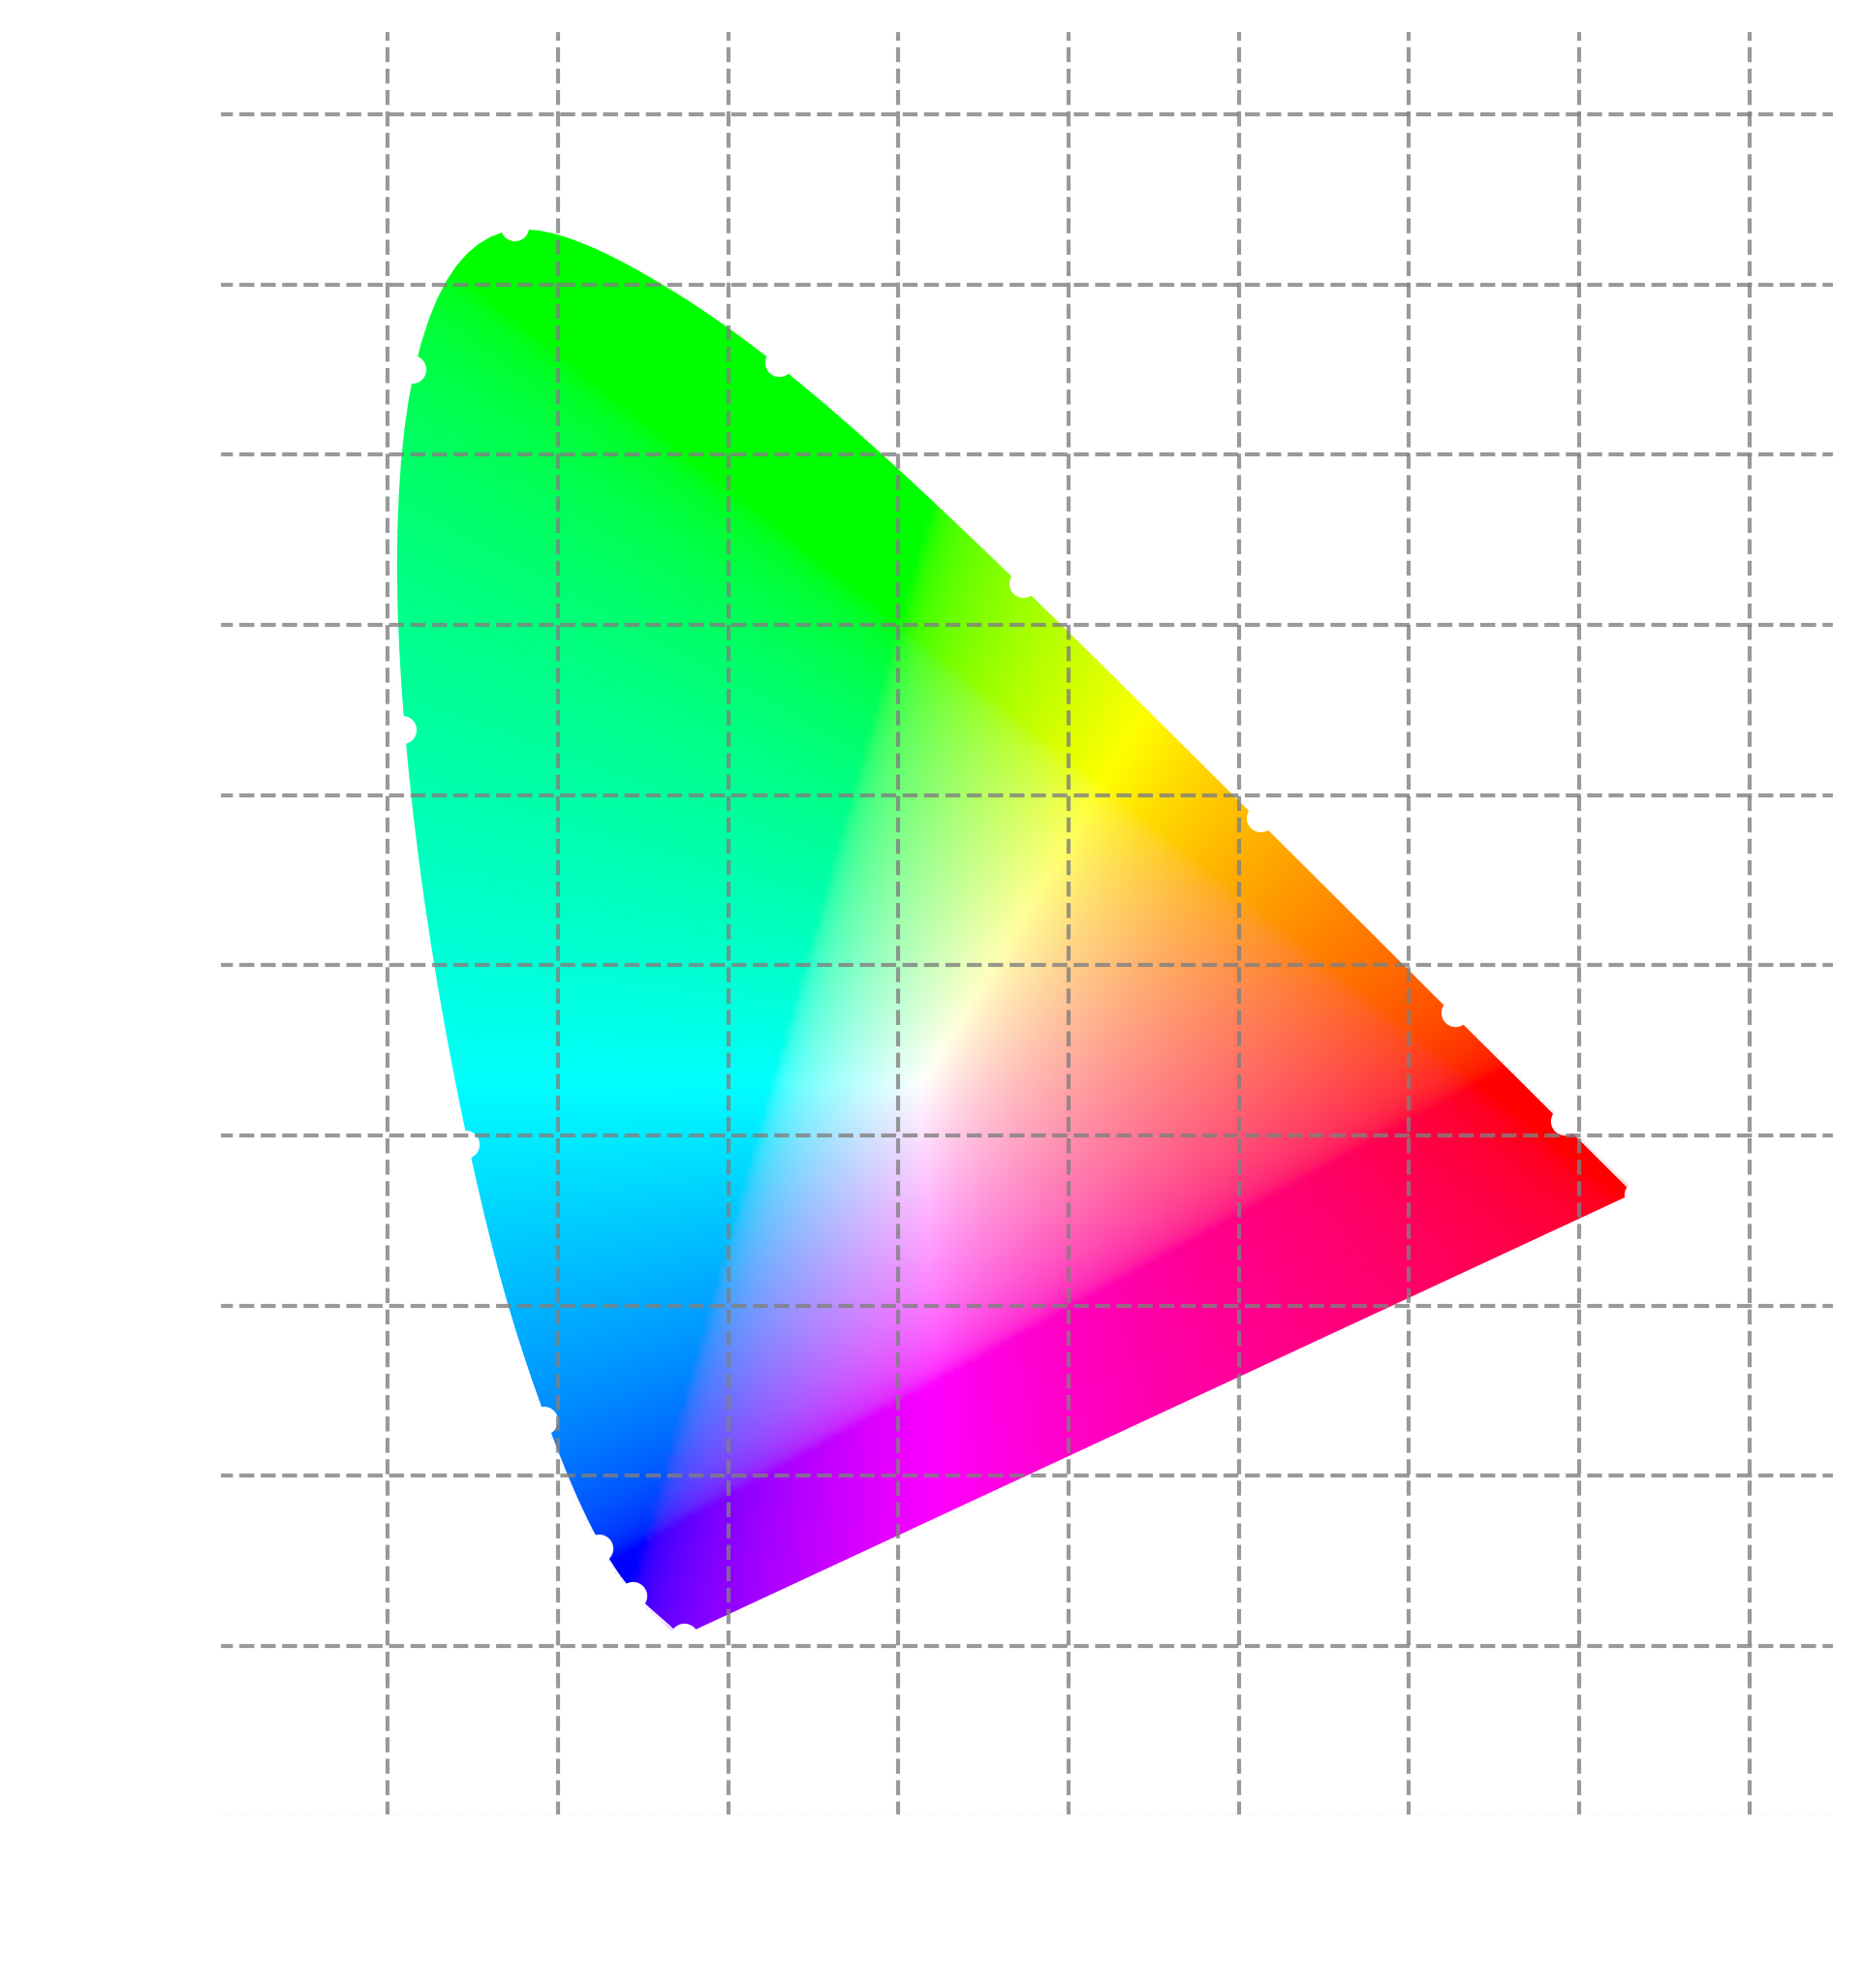

In [3]:
# Instantiate figure and axes
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

# Plot CIE color space for a 2°
cl.plotting.plot_chromaticity_diagram_CIE1931(
    cmfs="CIE 1931 2 Degree Standard Observer",
    axes=ax,
    show=False,
    title=None,
    spectral_locus_colours="white",
)

# Axes labels
ax.set_xlabel("x (2°)")
ax.set_ylabel("y (2°)")

# Axes limits
ax.set_xlim(-0.1, 0.85)
ax.set_ylim(-0.1, 0.95)

# Ticks separation
ax.xaxis.set_major_locator(tck.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(tck.MultipleLocator(0.01))
ax.yaxis.set_major_locator(tck.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(tck.MultipleLocator(0.01))

# Grid settings
ax.grid(which="major", axis="both", linestyle="--", color="gray", alpha=0.8)

# Padding adjustment
plt.tight_layout()

plt.show()

Pretty cool! Let's move on to the calculation of the color for some real
objects. This is going to result in a pair of coordinates which we are going to
visualize on the color space that we just obtained.

### Importing and scaling data

In this case, I am interested in calculating the color of Chrlorophyll A ad
Chlorophyll B using their recorded UV-Vis spectra. In the following, I am going
to use spectra available from literature and which were recorded in acetone
solutions.[@chazaux2022] You can download the `.csv` file
[here](./chlorophyll_uv_vis.csv).

In [4]:
column_names = ["lambda", "chl_a_70", "chl_a_90", "chl_b_70", "chl_b_90"]
measured_samples = pd.read_csv(
    "chlorophyll_uv_vis.csv", names=column_names, header=0, index_col="lambda"
)
measured_samples

,chl_a_70,chl_a_90,chl_b_70,chl_b_90
lambda,,,,
350.0,26132.0,25552.0,29529.0,28301.0
350.4,26251.0,25804.0,29574.0,28114.0
350.8,26666.0,26083.0,29350.0,27946.0
351.2,26703.0,26227.0,29084.0,27660.0
351.6,26834.0,26473.0,28991.0,27632.0
...,...,...,...,...
748.4,-63.0,-269.0,-15.0,-159.0
748.8,-80.0,-289.0,-2.0,-141.0
749.2,-95.0,-283.0,-13.0,-157.0


These values represent the absorbance $A$ of the two types of chlorophyll, that
is—the amount of white light that is absorbed by each molecule. Let's have a
quick look at the imported spectra, which are plotted in
@fig-chl-experimental-spectra:

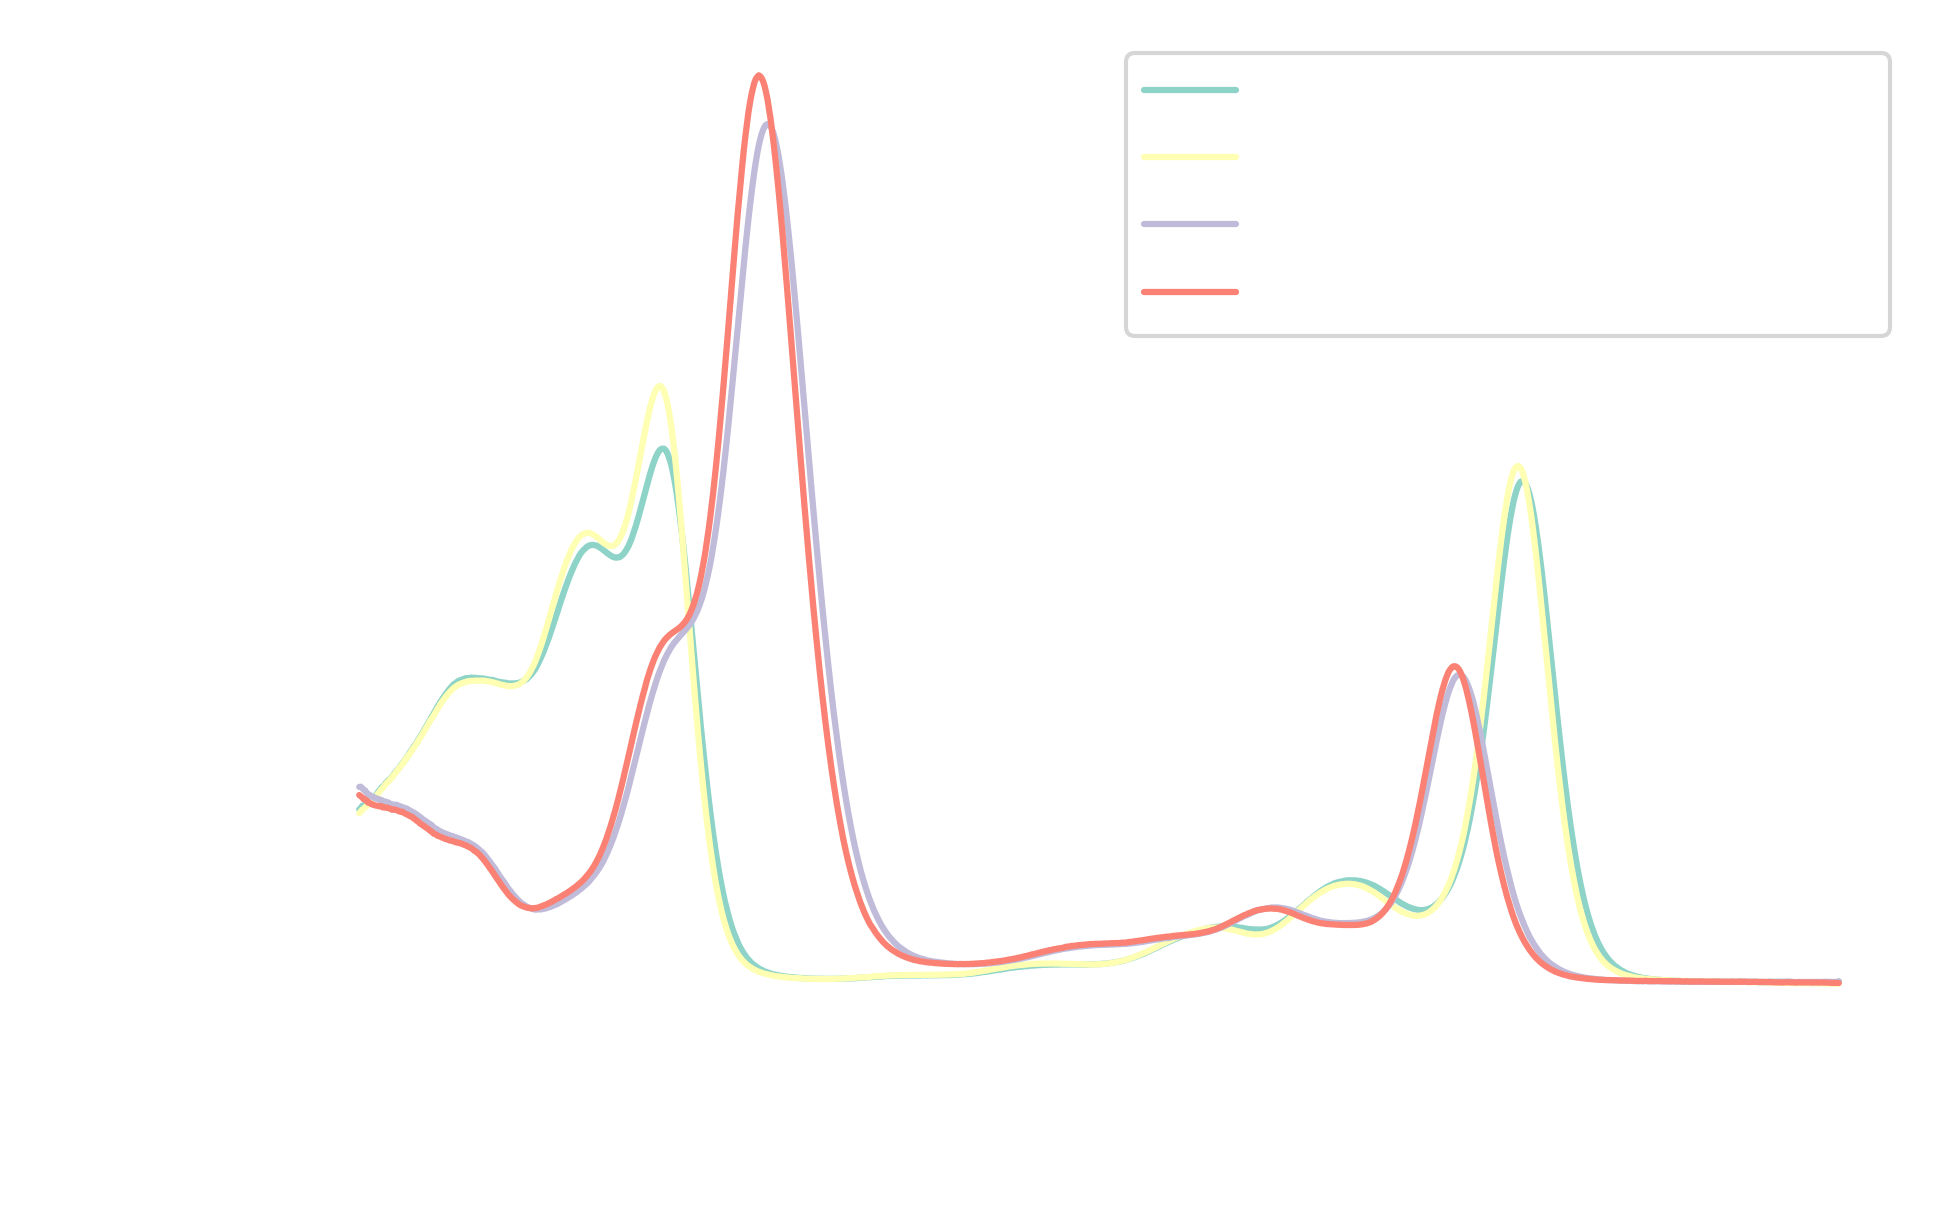

In [5]:
fig, ax = plt.subplots(1, 1, figsize=figure_size)

# Define the labels for the plot's legend
chl_labels = [
    "Chlorophyll A (70 % Acetone)",
    "Chlorophyll A (90 % Acetone)",
    "Chlorophyll B (70 % Acetone)",
    "Chlorophyll B (90 % Acetone)",
]

# Iterate over dataframe and plot each spectrum
for col, sample_label in zip(measured_samples.columns, chl_labels):
    ax.plot(measured_samples.index, measured_samples[col], label=sample_label)

# Ticks separation
ax.xaxis.set_major_locator(tck.MultipleLocator(50))
ax.xaxis.set_minor_locator(tck.MultipleLocator(10))

# Axes labels
ax.set_xlabel("Wavelength [nm]")
ax.set_ylabel("Absorbance [a.u.]")

# Display legend
ax.legend()

plt.show()

From a simple visual inspection, we can see that Chlorophyll A has two intense
absorption peaks at approximately 430 nm and 670 nm, while Chlorophyll B shows
peaks around 460 nm and 650 nm. Additionally, varying the amount of acetone as
the solvent affects the intensity of the peaks. While this does not alter the
overall shape of the spectra for each chlorophyll type, it does influence their
perceived color.

Before calculating the color of each spectrum, we need to prepare the data. The
absolute absorbance values differ significantly across the spectra. To make them
comparable, we need to normalize the data. This will result in the loss of
absolute absorbance values, which might be a drawback if performing
_quantitative_ analyses (e.g., determining concentration). However, since we are
focusing on a _qualitative_ analysis---comparing spectra---differences in
intensity scales would complicate the comparison.

The simplest way to address this is by normalizing the spectra, fitting each one
within an intensity range of 0 to 1, without changing the overall shape. I will
use a method known as _range scaling_ (also called MinMax scaling), expressed
mathematically as:[@otto2024, pp. 137--140]

$$
    x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}}
$$

Where $x$ is a single measured value, and $x_{min}$ and $x_{max}$ are the
minimum and maximum values of the spectrum, respectively, with $x_{scaled}$
being the resulting normalized value. Although the `scikit-learn` package
provides built-in functions for this (see
[here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)),
I prefer not to install a new library for a single function. Therefore, I will
define my own function, which I'll (very creatively) name `normalize`:

In [6]:
def normalize(x: pd.Series | np.ndarray) -> pd.Series | np.ndarray:
    """MinMax scaling from 0 to 1

    Args:
        x (pd.Series | np.ndarray): series or array to normalize

    Returns:
        pd.Series | np.ndarray: series or array of normalized values
    """
    x_scaled = (x - x.min()) / (x.max() - x.min())
    return x_scaled

We can now exploit vectorization and apply this function directly to the entire
dataframe of measured absorbance values. This is going to generate a new
dataframe with the scaled values, which I am going to store as a separate
variable which I am going to call `abs_norm`:

In [7]:
abs_norm = normalize(measured_samples)
abs_norm

,chl_a_70,chl_a_90,chl_b_70,chl_b_90
lambda,,,,
350.0,0.324398,0.285405,0.227556,0.207087
350.4,0.325869,0.288188,0.227903,0.205727
350.8,0.331001,0.291269,0.226179,0.204505
351.2,0.331458,0.292859,0.224133,0.202425
351.6,0.333078,0.295576,0.223417,0.202221
...,...,...,...,...
748.4,0.000507,0.000254,0.000262,0.000095
748.8,0.000297,0.000033,0.000362,0.000225
749.2,0.000111,0.000099,0.000277,0.000109


We can visually inspect that the absorbance values are now indeed comprised
between 0 and 1 by plotting the new values, as can be seen in
@fig-chl-norm-spectra:

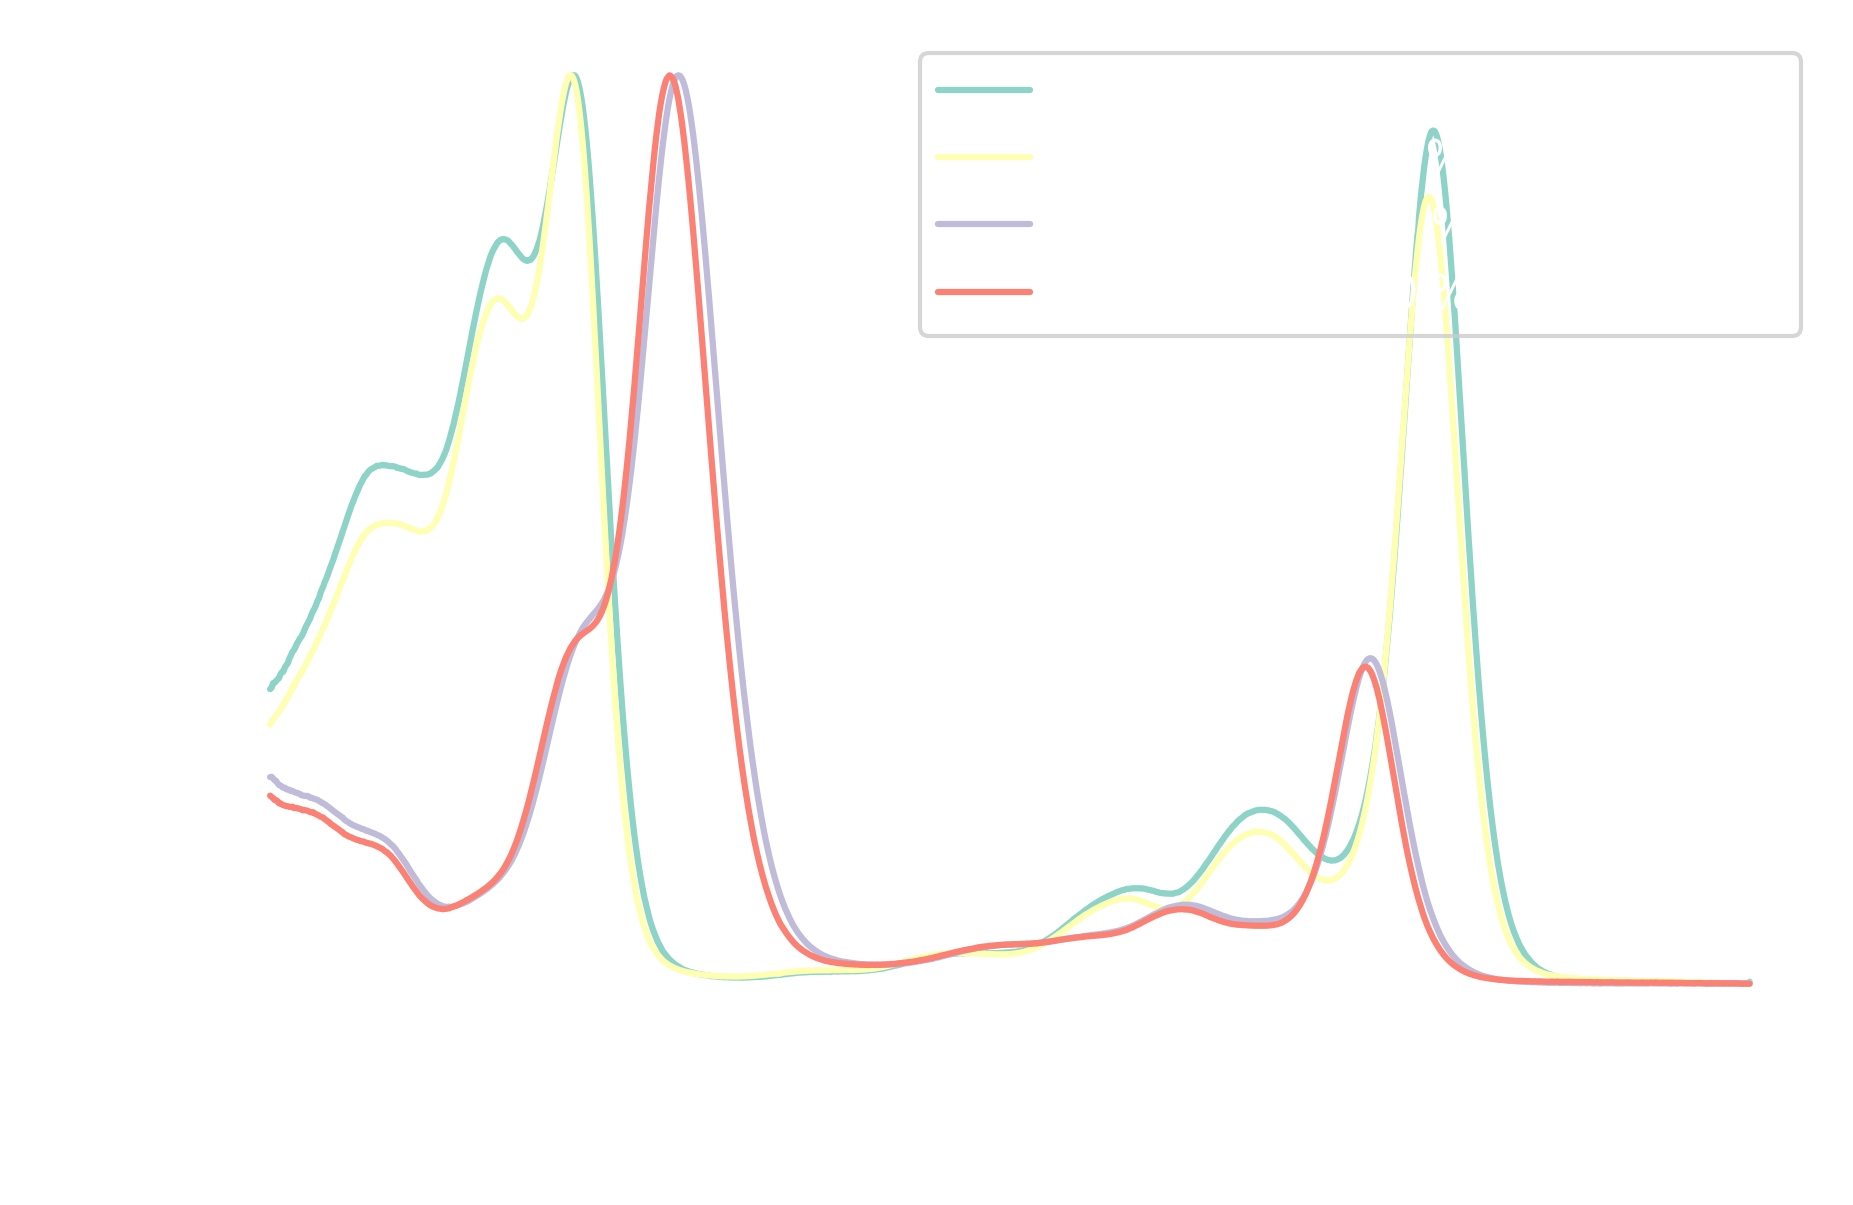

In [8]:
fig, ax = plt.subplots(1, 1, figsize=figure_size)

for col, sample_label in zip(abs_norm.columns, chl_labels):
    ax.plot(abs_norm.index, normalize(abs_norm[col]), label=f"{sample_label} norm")

# Ticks separation
ax.xaxis.set_major_locator(tck.MultipleLocator(50))
ax.xaxis.set_minor_locator(tck.MultipleLocator(10))
ax.yaxis.set_major_locator(tck.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(tck.MultipleLocator(0.025))

# Axes labels
ax.set_xlabel("Wavelength [nm]")
ax.set_ylabel("Absorbance [a.u.]")

# Display legend
ax.legend()

plt.show()

### Converting absorbance to transmittance

At this point, we are technically ready to calculate the colors from the scaled
spectra. However, it's important to remember that these spectra represent _light
absorbed_, not _light transmitted_. If we proceed with the current spectra, we
would be calculating the color of the light that is _not visible_---essentially,
the light that is subtracted from the incident white light.

To obtain the color we actually perceive, we need to convert absorbance ($A$)
into transmittance ($T$). Transmittance represents the light that passes through
the molecules without being absorbed and reaches our eyes, creating the actual
color sensation. Fortunately, this conversion is simple and follows the
equation:

$$ T = 10^{(2 - A)} $$

Using our normalized absorbance values, we can readily perform the conversion by
defining a further function, which I am going to call `abs_to_trans`:

In [9]:
def abs_to_trans(A: pd.Series | np.ndarray) -> pd.Series | np.ndarray:
    """Convert absorbance to transmittance

    Args:
        A (pd.Series | np.ndarray): series or array of absorbance values

    Returns:
        pd.Series | np.ndarray: series or array of transmittance values
    """
    T = 10 ** (2 - A)
    return T

Similarly to what we have done for scaling values, we can apply this new
function to the entire dataframe in one go and generate a new dataframe with the
normalized values for the transmittance:

In [10]:
transm_norm = abs_to_trans(abs_norm)
transm_norm

,chl_a_70,chl_a_90,chl_b_70,chl_b_90
lambda,,,,
350.0,47.380775,51.831637,59.216627,62.074481
350.4,47.220520,51.500565,59.169440,62.269182
350.8,46.665880,51.136488,59.404698,62.444622
351.2,46.616747,50.949585,59.685281,62.744426
351.6,46.443207,50.631871,59.783692,62.773854
...,...,...,...,...
748.4,99.883339,99.941532,99.939788,99.978231
748.8,99.931694,99.992372,99.916775,99.948098
749.2,99.974380,99.977117,99.936247,99.974883


Let's plot the new values and check that everything worked correctly:

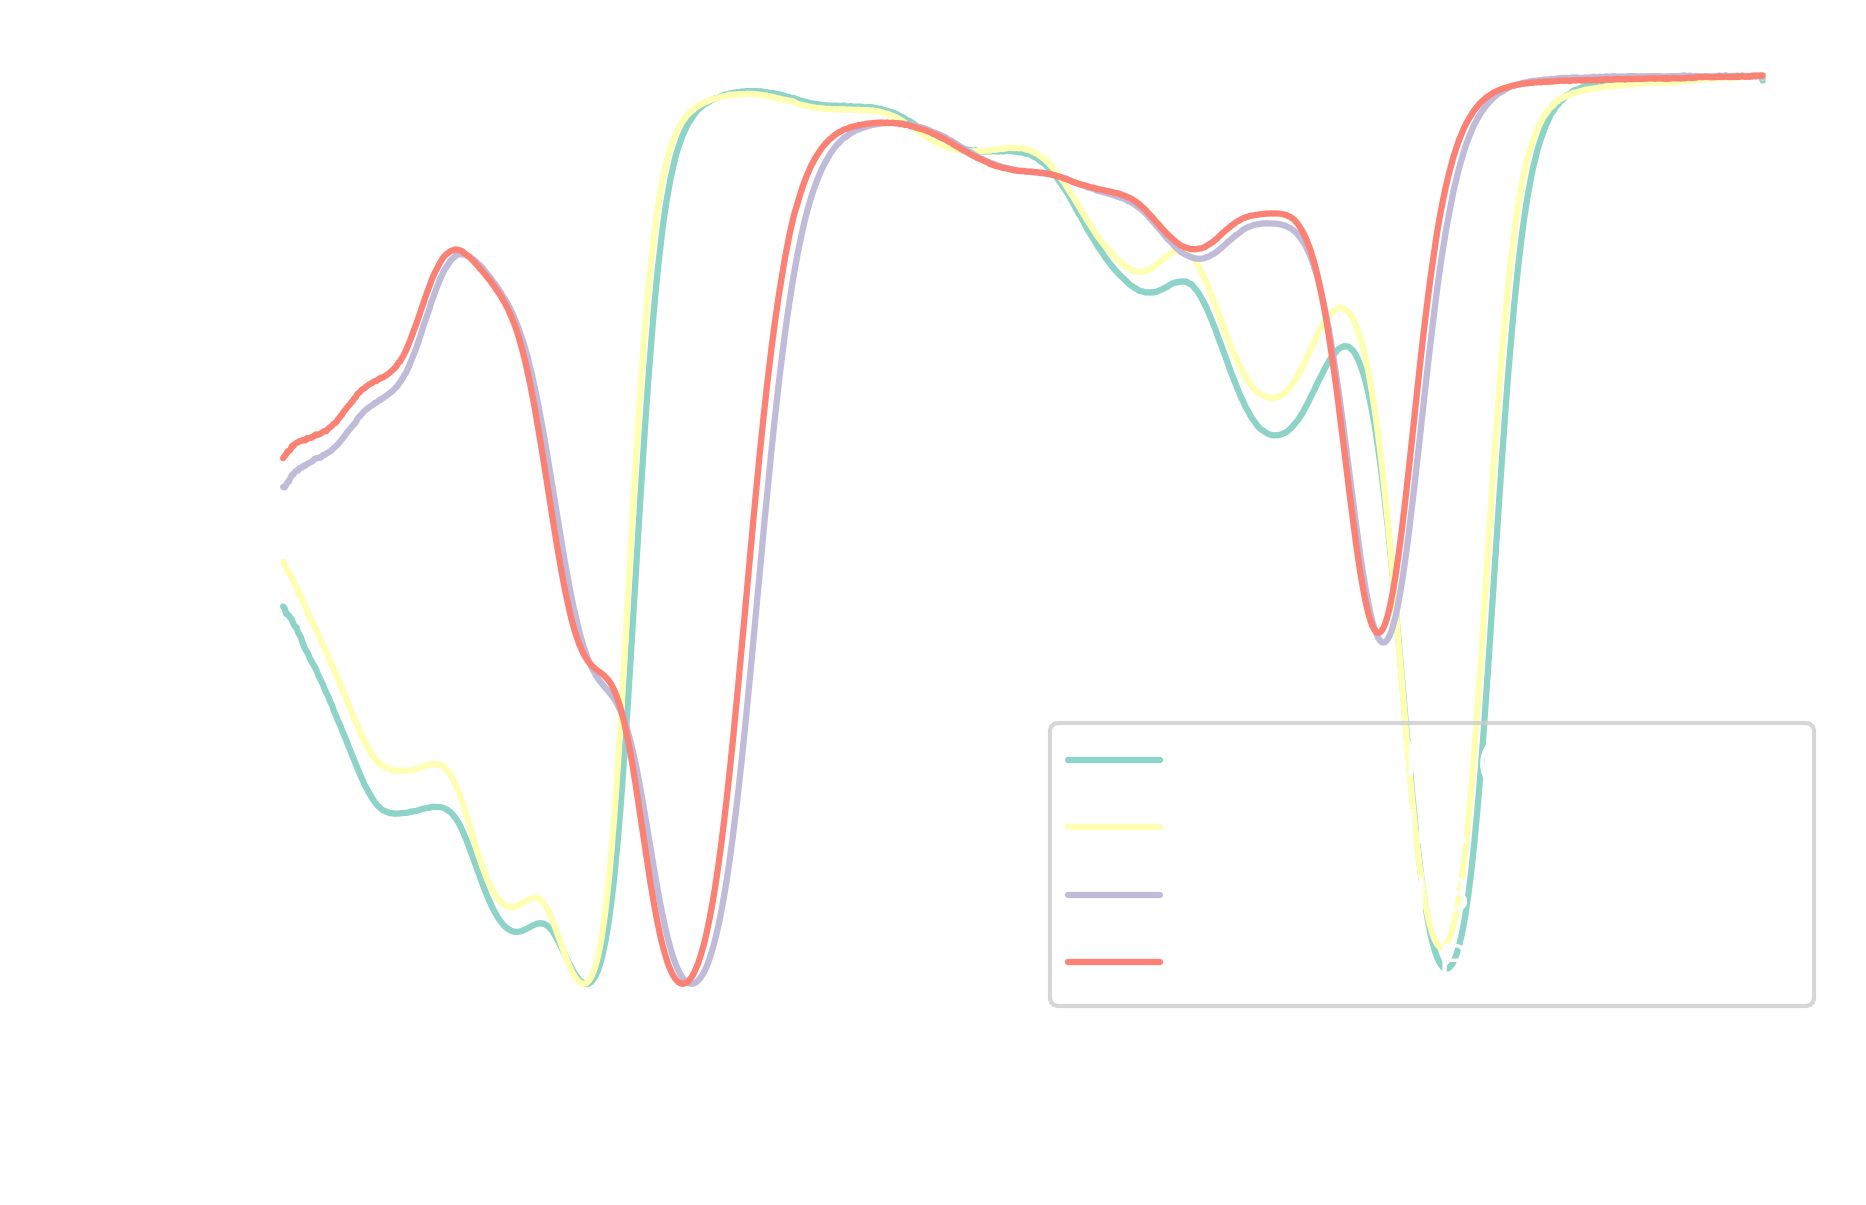

In [11]:
fig, ax = plt.subplots(1, 1, figsize=figure_size)

for col, sample_label in zip(transm_norm.columns, chl_labels):
    ax.plot(transm_norm.index, transm_norm[col], label=f"{sample_label}")

# Ticks separation
ax.xaxis.set_major_locator(tck.MultipleLocator(50))
ax.xaxis.set_minor_locator(tck.MultipleLocator(10))
ax.yaxis.set_major_locator(tck.MultipleLocator(10))
ax.yaxis.set_minor_locator(tck.MultipleLocator(5))

# Axes labels
ax.set_xlabel("Wavelength [nm]")
ax.set_ylabel("Transmittance [%]")

# Display legend
ax.legend()

plt.show()

We can go one step further and display both absorbance and transmittance in one
plot as follows:

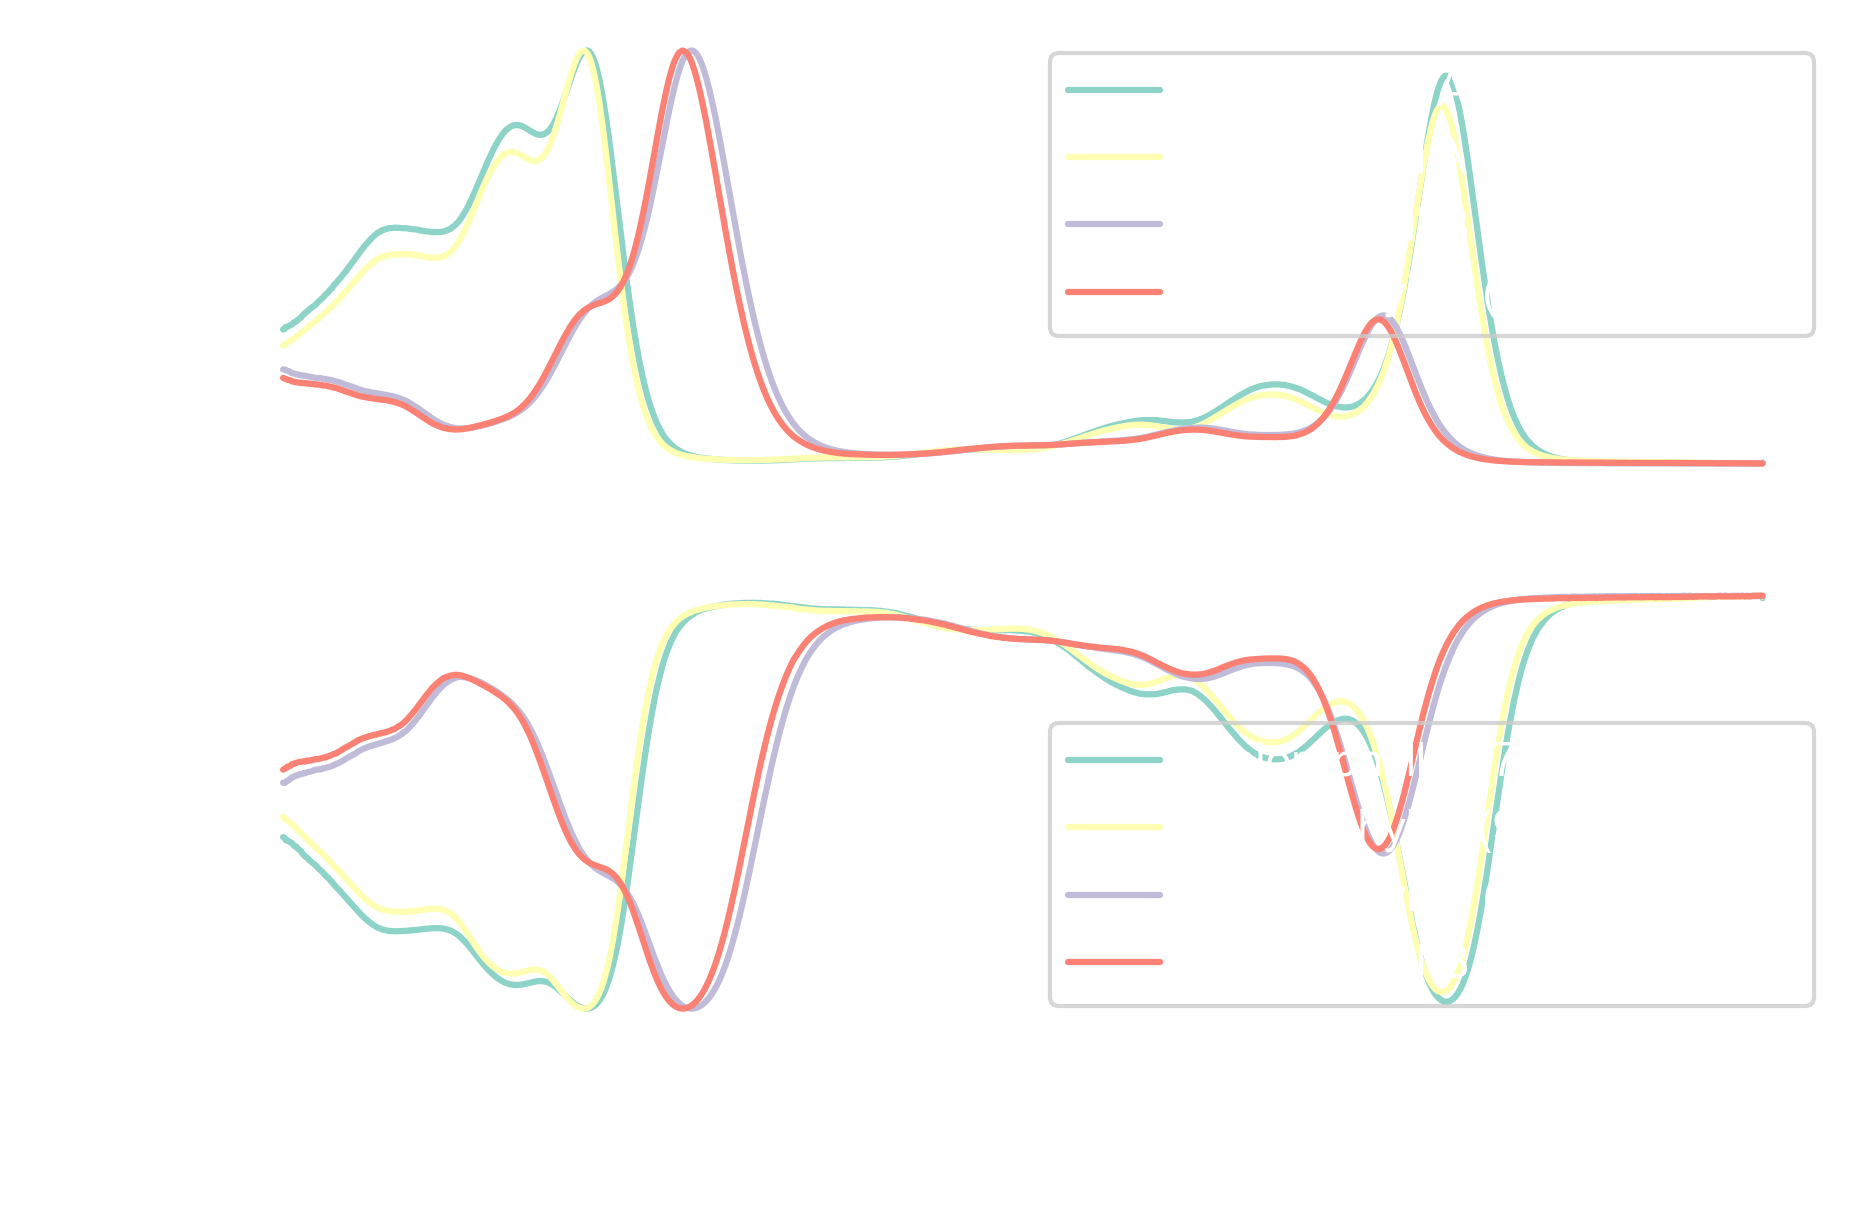

In [12]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=figure_size)

# Iterate over absorbance dataframe
for col, sample_label in zip(abs_norm.columns, chl_labels):
    ax[0].plot(abs_norm.index, normalize(abs_norm[col]), label=f"{sample_label}")

# Iterate over transmittance dataframe
for col, sample_label in zip(transm_norm.columns, chl_labels):
    ax[1].plot(transm_norm.index, transm_norm[col], label=f"{sample_label}")

# Axes labels
ax[0].set_ylabel("Absorbance [a.u.]")

ax[1].set_xlabel("Wavelength [nm]")
ax[1].set_ylabel("Transmittance [%]")

# Ticks separation
for axis in ax:
    axis.xaxis.set_major_locator(tck.MultipleLocator(50))
    axis.xaxis.set_minor_locator(tck.MultipleLocator(10))
    # Display legend
    axis.legend()

ax[0].yaxis.set_major_locator(tck.MultipleLocator(0.1))
ax[0].yaxis.set_minor_locator(tck.MultipleLocator(0.025))
ax[1].yaxis.set_major_locator(tck.MultipleLocator(10))
ax[1].yaxis.set_minor_locator(tck.MultipleLocator(5))

plt.show()

### Calculating the CIE colors

We are now ready to go into the calculations. To do this, we need to do the
following:

- Select the appropriate color matching functions. We are going to use the CIE
  1931 system, which can be called in `colour-science` by the `cie_2_1931`
  keyword.
- Select the appropriate illuminant. In this case I am interested in the color
  of chlorophyll under daylight conditions, which are simulated by the `D65`
  illuminant.
- Create a spectral distribution for each spectrum using the appropriate
  `SpectralDistribution` function from `colour-science`. This is not strictly
  necessary, as we could also pass the `pandas` series or `numpy` array
  directly. However, using a spectral distribution instance provides some useful
  methods, which we can take advantage of. One of these is the `interpolate`
  method, which allows us to interpolate our spectra according to the CIE
  specifications. In fact, the recorded spectra are measured at intervals of 0.1
  nm, whereas the CIE specifications require spectra with intervals of 1 nm.
- Calculate the $X$, $Y$, and $Z$ CIE values from the spectral distribution.
- Convert the $X$, $Y$, and $Z$ values to $x$ and $y$ values that we can plot on
  the color space.

In this case, I am doing all at once through a for loop, iterating over each
spectrum in our dataframe and doing the calculations one at a time. For
convenience, I am storing the values for each spectrum in a dictionary, which I
am going to append to a list called `chl_abs_clr` and that I am going to use
later for plotting the values.

In [13]:
# Define color matching functions
cmfs = cl.MSDS_CMFS["cie_2_1931"]

# Define illuminant
illuminant = cl.SDS_ILLUMINANTS["D65"]

chl_abs_clr = []

# Iterate over each normalized absorbance spectrum
for col in abs_norm.columns:
    # Initialize spectral distribution
    sd = cl.SpectralDistribution(data=abs_norm[col])

    # Interpolate sd to conform to the CIE specifications
    sd = sd.interpolate(cl.SpectralShape(350, 750, 1))

    # Calculate CIE XYZ coordinates from spectral distribution
    cie_XYZ = cl.sd_to_XYZ(sd, cmfs, illuminant)

    # Convert to CIE xy coordinates
    cie_xy = cl.XYZ_to_xy(cie_XYZ)

    # Append the results to the list of sample colors
    chl_abs_clr.append(
        {"sample": col, "x_A": np.round(cie_xy[0], 4), "y_A": np.round(cie_xy[1], 4)}
    )

chl_transm_clr = []

# Iterate over each normalized transmittance spectrum
for col in transm_norm.columns:
    # Initialize spectral distribution
    sd = cl.SpectralDistribution(data=transm_norm[col])
    sd = sd.interpolate(cl.SpectralShape(350, 750, 1))

    # Calculate CIE XYZ coordinates from spectral distribution
    cie_XYZ = cl.sd_to_XYZ(sd, cmfs, illuminant)

    # Convert to CIE xy coordinates
    cie_xy = cl.XYZ_to_xy(cie_XYZ)

    # Append the results to the list of sample colors
    chl_transm_clr.append(
        {"sample": col, "x_T": np.round(cie_xy[0], 4), "y_T": np.round(cie_xy[1], 4)}
    )

# Convert dictionaries to dataframes and join them together
colors = pd.merge(pd.DataFrame(chl_transm_clr), pd.DataFrame(chl_abs_clr))
colors

,sample,x_T,y_T,x_A,y_A
0,chl_a_70,0.3046,0.3777,0.2966,0.1330
1,chl_a_90,0.3063,0.3721,0.2948,0.1345
2,chl_b_70,0.3558,0.4365,0.2036,0.0930
3,chl_b_90,0.3538,0.4334,0.2048,0.0904


Simple, isn't it? Now that we have the $x$ and $y$ values for the transmitted
and absorbed colors, we can plot the result on the CIE color space:

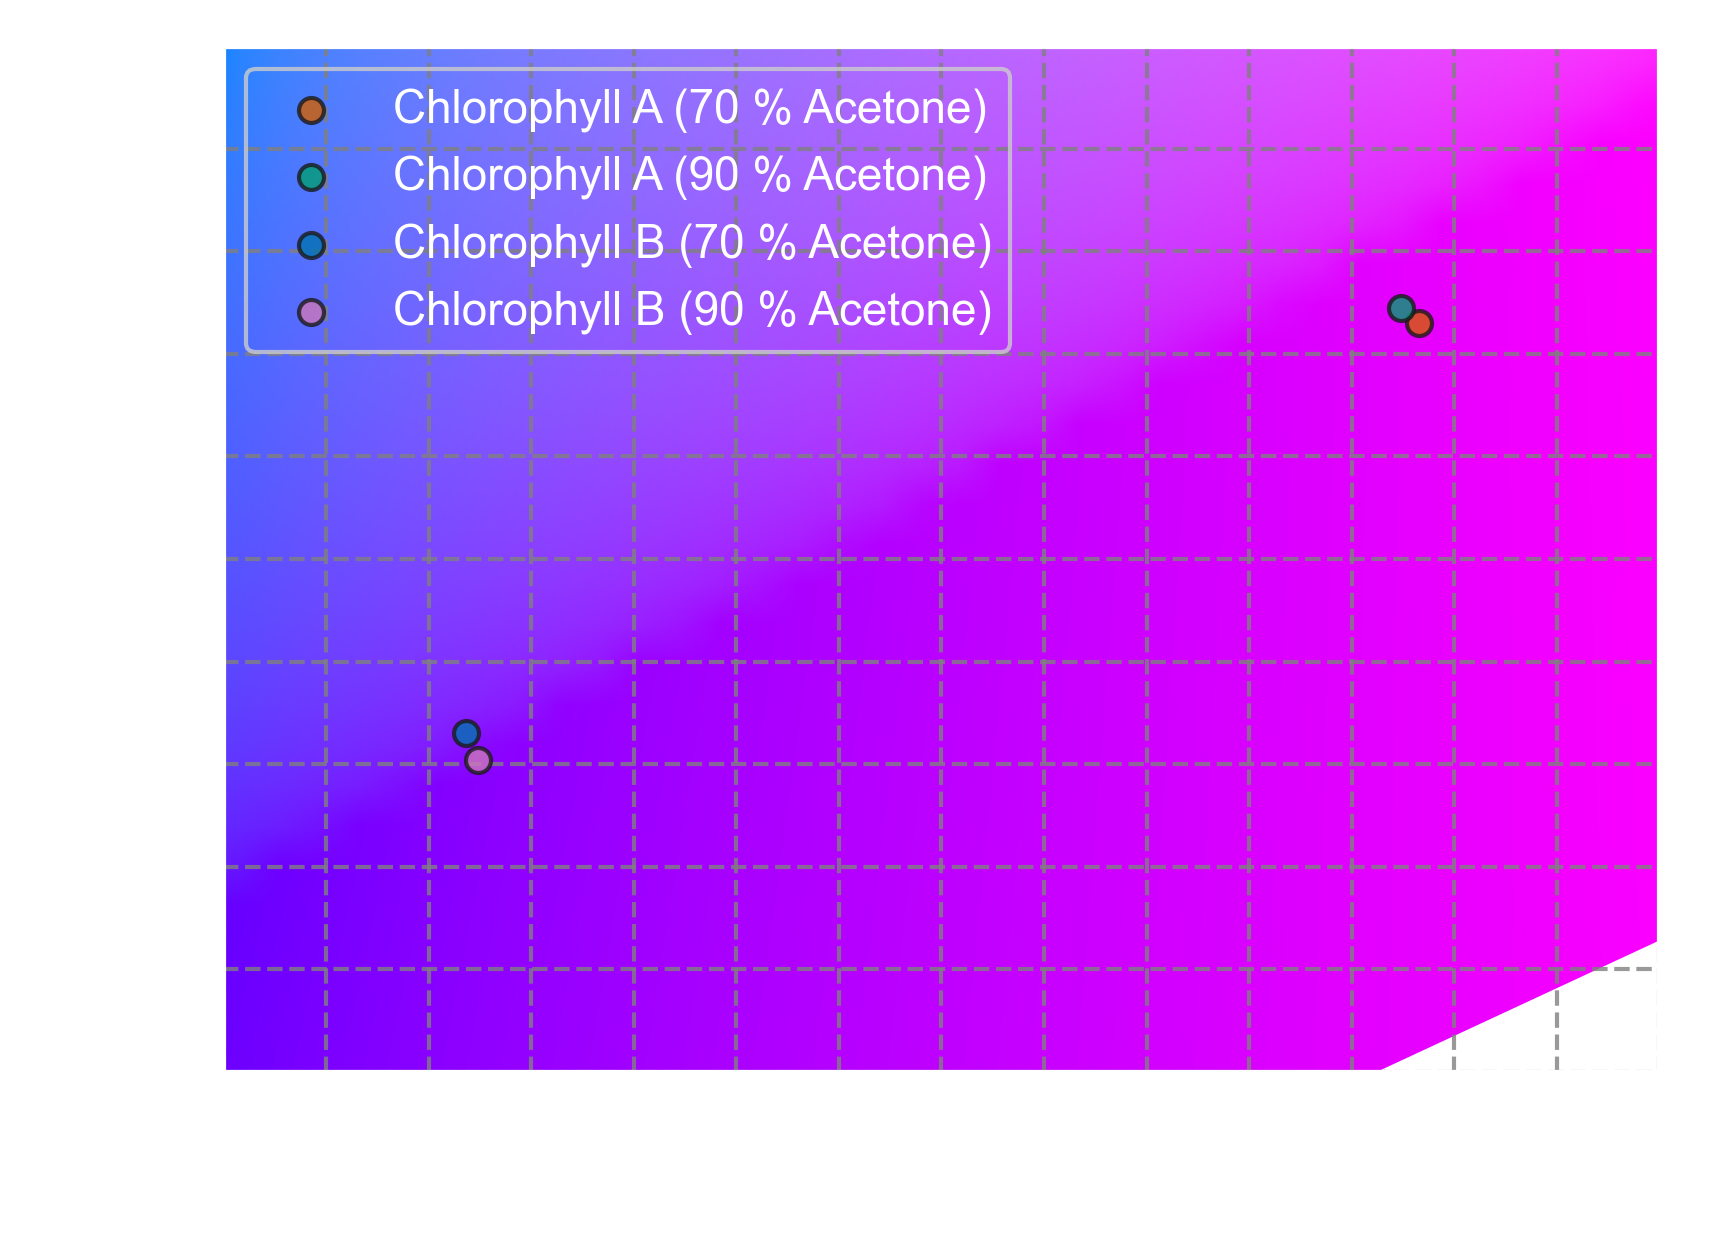

In [14]:
# Instantiate figure and axes
fig, ax = plt.subplots(1, 1, figsize=figure_size)

# Plot CIE color space for a 2°
cl.plotting.plot_chromaticity_diagram_CIE1931(
    cmfs="CIE 1931 2 Degree Standard Observer",
    axes=ax,
    show=False,
    title=None,
    spectral_locus_colours="white",
)

color_list = ["r", "g", "b", "m"]

for i, c in enumerate(color_list):
    ax.scatter(
        colors["x_A"][i],
        colors["y_A"][i],
        label=chl_labels[i],
        color=c,
        edgecolors="k",
        alpha=0.8,
    )

# Axes labels
ax.set_xlabel("x (2°)")
ax.set_ylabel("y (2°)")

# Axes limits
ax.set_xlim(0.18, 0.32)
ax.set_ylim(0.06, 0.16)

# Ticks separation
ax.xaxis.set_major_locator(tck.MultipleLocator(0.01))
ax.xaxis.set_minor_locator(tck.MultipleLocator(0.005))
ax.yaxis.set_major_locator(tck.MultipleLocator(0.01))
ax.yaxis.set_minor_locator(tck.MultipleLocator(0.005))

# Grid settings
ax.grid(which="major", axis="both", linestyle="--", color="gray", alpha=0.8)

# Display legend
ax.legend()

# Adjust plot padding
plt.tight_layout()

plt.show()

Let's repeat the same procedure once again to calculate the transmitted colors:

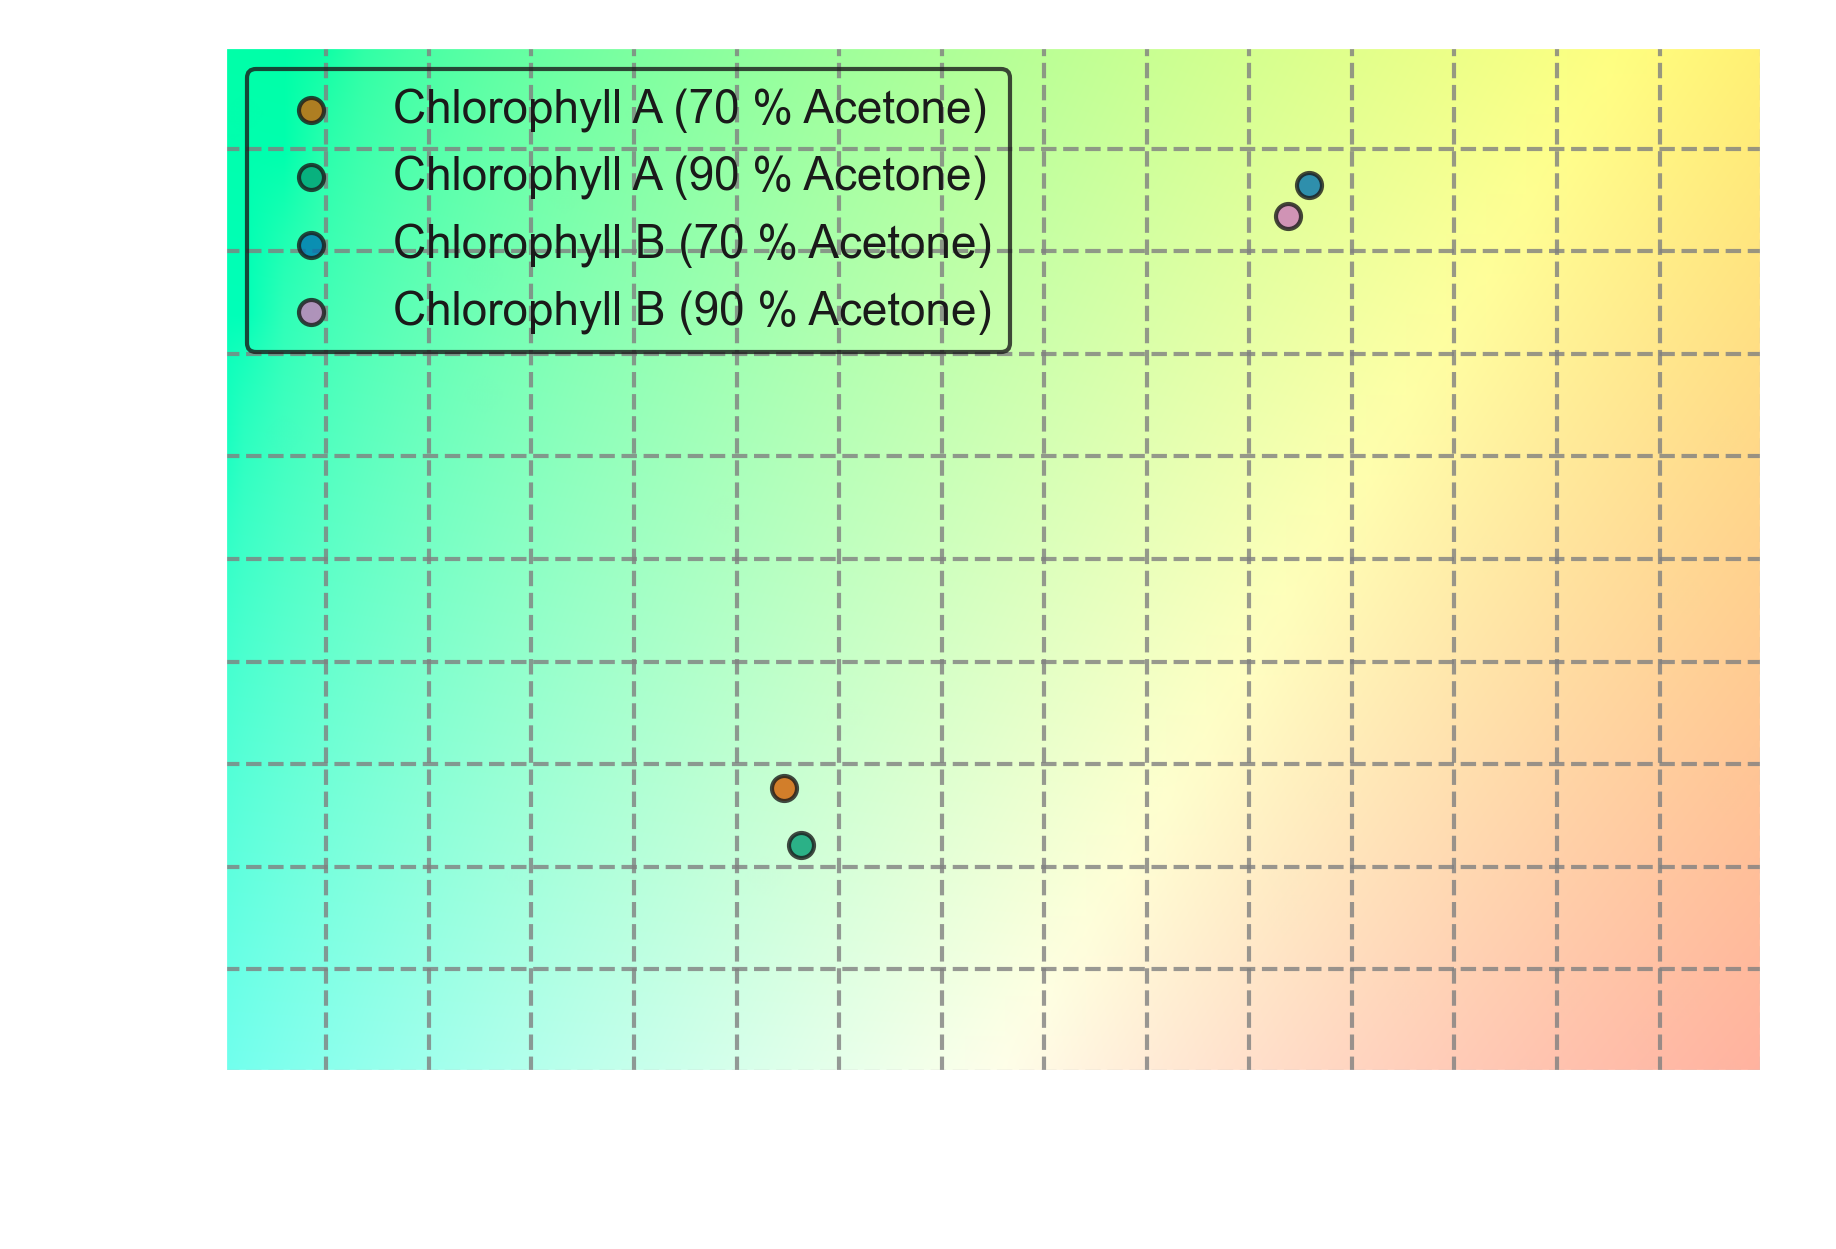

In [15]:
# Instantiate figure and axes
fig, ax = plt.subplots(1, 1, figsize=figure_size)

# Plot CIE color space for a 2°
cl.plotting.plot_chromaticity_diagram_CIE1931(
    cmfs="CIE 1931 2 Degree Standard Observer",
    axes=ax,
    show=False,
    title=None,
    spectral_locus_colours="white",
)

color_list = ["r", "g", "b", "m"]

for i, c in enumerate(color_list):
    ax.scatter(
        colors["x_T"][i],
        colors["y_T"][i],
        label=chl_labels[i],
        color=c,
        edgecolors="k",
        alpha=0.8,
    )

# Axes labels
ax.set_xlabel("x (2°)")
ax.set_ylabel("y (2°)")

# Axes limits
ax.set_xlim(0.25, 0.4)
ax.set_ylim(0.35, 0.45)

# Ticks separation
ax.xaxis.set_major_locator(tck.MultipleLocator(0.01))
ax.xaxis.set_minor_locator(tck.MultipleLocator(0.005))
ax.yaxis.set_major_locator(tck.MultipleLocator(0.01))
ax.yaxis.set_minor_locator(tck.MultipleLocator(0.005))

# Grid settings
ax.grid(which="major", axis="both", linestyle="--", color="gray", alpha=0.8)

# Display legend
ax.legend(labelcolor="k", edgecolor="k")

# Adjust plot padding
plt.tight_layout()

plt.show()

(1) Kingdom, F. A. A.; Prins, N. *Psychophysics: A Practical Introduction*, 2nd ed.; Academic Press: Amsterdam, NL, 2016. <https://doi.org/10.1016/C2012-0-01278-1>.

(2) Schanda, J. *Colorimetry: Understanding the CIE System*; John Wiley & Sons: Hoboken, NJ, USA, 2007. <https://doi.org/10.1002/9780470175637>.

(3) Guild, J. The Colorimetric Properties of the Spectrum. *Phil. Trans. R. Soc. Lond. A* **1931**, *230* (681-693), 149--187. <https://doi.org/10.1098/rsta.1932.0005>.

(4) Smith, T.; Guild, J. The C.I.E. Colorimetric Standards and Their Use. *Trans. Opt. Soc.* **1931**, *33* (3), 73--134. <https://doi.org/10.1088/1475-4878/33/3/301>.

(5) Fairman, H. S.; Brill, M. H.; Hemmendinger, H. How the Cie 1931 Color-Matching Functions Were Derived from Wright-Guild Data. *Color Res. Appl.* **1997**, *22* (1), 11--23. [https://doi.org/10.1002/(SICI)1520-6378(199702)22:1\<11::AID-COL4\>3.0.CO;2-7](https://doi.org/10.1002/(SICI)1520-6378(199702)22:1<11::AID-COL4>3.0.CO;2-7).

(6) Chazaux, M.; Schiphorst, C.; Lazzari, G.; Caffarri, S. Precise Estimation of Chlorophyll a , b and Carotenoid Content by Deconvolution of the Absorption Spectrum and New Simultaneous Equations for Chl Determination. *Plant J.* **2022**, *109* (6), 1630--1648. <https://doi.org/10.1111/tpj.15643>.

(7) Otto, M. *Chemometrics: Statistics and Computer Application in Analytical Chemistry*, 4th ed.; Wiley-VCH Verlag: Weinheim, DE, 2024. <https://doi.org/10.1002/9783527843800>.